In [2]:
import numpy as np
import pandas as pd
import csv
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3
import scipy 
from scipy import stats
import math
from math import sqrt
from sklearn import preprocessing


In [3]:
conn = sqlite3.connect('im.db')

In [4]:
q1 = """
SELECT *
FROM movie_basics
;
"""
pd.read_sql(q1, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [5]:
q3 = """
SELECT *
FROM movie_ratings
WHERE averagerating > 8
;
"""
pd.read_sql(q3, conn)


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1326743,8.4,21
3,tt1403990,8.5,31
4,tt1409015,8.2,40
...,...,...,...
8215,tt9219848,8.7,18
8216,tt9367004,8.2,5
8217,tt9590776,9.2,37
8218,tt9768966,8.6,27


In [6]:
q4 = """
SELECT *
FROM movie_ratings
WHERE averagerating > 9 and numvotes > 500
;
"""
pd.read_sql(q4, conn)


,movie_id,averagerating,numvotes
0,tt9680166,9.6,624
1,tt7738784,9.4,9629
2,tt5813916,9.3,100568
3,tt5354160,9.3,18470
4,tt5773402,9.2,1096
5,tt5311546,9.2,4297
6,tt5963218,9.5,6509
7,tt9261840,9.2,767
8,tt9390200,9.4,816
9,tt9231140,9.1,4162


In [7]:
pd.read_csv('tmdb.movies.csv')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [8]:
df1 = pd.read_csv('bom.movie_gross.csv')

In [9]:
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,<<<<<<< HEAD,NaN,NaN,NaN,NaN
1,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011.0
2,Avengers: Age of Ultron,BV,459000000.0,946400000,2015.0
3,Marvel's The Avengers,BV,623400000.0,895500000,2012.0
4,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018.0


# IMDB Nikhil

In [10]:
# conn = sqlite3.connect('Data/im.db')
imdb = pd.read_sql('''
Select *
    FROM movie_basics
    JOIN movie_ratings
        USING(movie_id)
''', conn)

imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [11]:
imdb.runtime_minutes.describe()

count    66236.000000
mean        94.654040
std        208.574111
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

In [12]:
imdb.shape

(73856, 8)

In [13]:
imdb.numvotes.describe()

count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

In [14]:
len(imdb.query('numvotes > 750'))

11218

# The Movie Database

In [15]:
# read data in
tmdb = pd.read_csv('tmdb.movies.csv', index_col=0)
tmdb.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [16]:
tmdb.shape

(26517, 9)

In [17]:
tmdb.isna().any()

genre_ids            False
id                   False
original_language    False
original_title       False
popularity           False
release_date         False
title                False
vote_average         False
vote_count           False
dtype: bool

In [18]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [19]:
# change release date to datetime
tmdb.release_date = pd.to_datetime(tmdb.release_date)
# turn genre ids into lists
tmdb.genre_ids = tmdb.genre_ids.str.strip('[]').str.split(',')
# remove whitespace from genre ids
tmdb.genre_ids = tmdb.genre_ids.apply(lambda x: [y.strip() for y in x])
# add release month column
tmdb['release_month'] = tmdb.release_date.dt.month
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
 9   release_month      26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.2+ MB


In [20]:
tmdb.describe()

,id,popularity,vote_average,vote_count,release_month
count,26517.000000,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837,6.405966
std,153661.615648,4.355229,1.852946,960.961095,3.573796
min,27.000000,0.600000,0.000000,1.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000,3.000000
50%,309581.000000,1.374000,6.000000,5.000000,6.000000
75%,419542.000000,3.694000,7.000000,28.000000,10.000000
max,608444.000000,80.773000,10.000000,22186.000000,12.000000


In [21]:
# remove rows where there are fewer than 28 votes
tmdb_final = tmdb.query('vote_count >= 100').copy()
print(tmdb_final.shape)
tmdb_final.describe()

(3686, 10)


,id,popularity,vote_average,vote_count,release_month
count,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000
mean,223283.718394,11.281023,6.389392,1325.535269,6.974498
std,144382.238450,6.196958,0.862305,2270.643058,3.449799
min,27.000000,0.600000,2.000000,100.000000,1.000000
25%,78090.500000,7.557750,5.800000,186.000000,4.000000
50%,234102.000000,9.395000,6.400000,422.000000,7.000000
75%,339966.250000,12.894000,7.000000,1306.000000,10.000000
max,569547.000000,80.773000,8.600000,22186.000000,12.000000


In [22]:
tmdb_finalDF = pd.DataFrame(tmdb_final)

In [23]:
# create a new dataframe where the genre ids are separated
ids = []
genre_ids = []
vote_averages = []

popularity_by_genre = {'id': ids, 'genre_ids': genre_ids, 'vote_average': vote_averages}

for index, row in tmdb_final.iterrows():
    for genre in row[0]:
        ids.append(row[1])
        genre_ids.append(genre)
        vote_averages.append(row[7])

popularity_by_genre = pd.DataFrame(popularity_by_genre)
popularity_by_genre

,id,genre_ids,vote_average
0,12444,12,7.7
1,12444,14,7.7
2,12444,10751,7.7
3,10191,14,7.7
4,10191,12,7.7
...,...,...,...
9194,531949,35,5.3
9195,489430,27,6.4
9196,5961,14,7.8
9197,5961,18,7.8


In [24]:
genre_mappings = {
    '28': 'Action',
    '12': 'Adventure',
    '16': 'Animation',
    '35': 'Comedy',
    '80': 'Crime',
    '99': 'Documentary',
    '18': 'Drama',
    '10751': 'Family',
    '14': 'Fantasy',
    '36': 'History',
    '27': 'Horror',
    '10402': 'Music',
    '9648': 'Mystery',
    '10749': 'Romance',
    '878': 'Science Fiction',
    '10770': 'TV Movie',
    '53': 'Thriller',
    '10752': 'War',
    '37': 'Western'
}


In [25]:
popularity_by_genre['genre'] = popularity_by_genre.genre_ids.map(genre_mappings)
popularity_by_genre.head()

,id,genre_ids,vote_average,genre
0,12444,12,7.7,Adventure
1,12444,14,7.7,Fantasy
2,12444,10751,7.7,Family
3,10191,14,7.7,Fantasy
4,10191,12,7.7,Adventure


In [26]:
popularity_by_genre[['genre_ids', 'vote_average']].groupby('genre_ids').describe()

vote_average                                                
                 count      mean       std  min    25%   50%  75%  max
genre_ids                                                             
10402            100.0  6.755000  0.822459  4.9  6.275  6.70  7.4  8.4
10749            515.0  6.531845  0.780898  4.0  6.000  6.50  7.1  8.6
10751            341.0  6.565103  0.813697  4.2  5.900  6.60  7.1  8.5
10752             96.0  6.876042  0.751804  5.1  6.375  6.85  7.4  8.5
10770             65.0  6.393846  0.914446  3.5  6.100  6.40  7.0  7.9
12               516.0  6.414922  0.805750  3.8  5.900  6.40  7.0  8.4
14               355.0  6.446761  0.824628  4.0  5.900  6.40  7.0  8.5
16               320.0  6.827187  0.788382  4.2  6.300  6.80  7.4  8.6
18              1779.0  6.615683  0.789103  2.8  6.100  6.70  7.2  8.6
27               531.0  5.680414  0.775055  2.0  5.200  5.70  6.2  7.7
28               798.0  6.241855  0.816688  3.5  5.700  6.20  6.8  8.4
35              1154.0  6.288995  0.788353  3.3  5.800  6.30  6.8  8.4
36               161.0  6.949068  0.702417  4.5  6.500  7.00  7.4  8.5
37                41.0  6.463415  0.850516  4.6  5.800  6.50  7.2  8.0
53              1080.0  6.085093  0.786794  3.3  5.600  6.10  6.6  8.3
80               478.0  6.348745  0.747511  4.1  5.800  6.30  6.9  8.4
878              424.0  6.232075  0.932578  2.0  5.600  6.20  6.9  8.4
9648             323.0  6.200000  0.842136  3.3  5.700  6.20  6.7  8.2
99               122.0  7.346721  0.651658  5.1  6.925  7.40  7.8  8.6

In [27]:
popularity_by_genre.values

array([[12444, '12', 7.7, 'Adventure'],
       [12444, '14', 7.7, 'Fantasy'],
       [12444, '10751', 7.7, 'Family'],
       ...,
       [5961, '14', 7.8, 'Fantasy'],
       [5961, '18', 7.8, 'Drama'],
       [5961, '9648', 7.8, 'Mystery']], dtype=object)

# Movie Budgets

In [28]:
movie_budgets = pd.read_csv('../Data/tn.movie_budgets.csv')
print(movie_budgets.shape)
movie_budgets.head()

(5782, 6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [29]:
movie_budgets.isna().any()

id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
dtype: bool

In [30]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [31]:
movie_budgets['production_budget'] = (movie_budgets['production_budget']
                                      .str.replace(',', '')
                                      .str.replace('$', '')
                                      .astype(float))

movie_budgets['domestic_gross'] = (movie_budgets['domestic_gross']
                                   .str.replace(',', '')
                                   .str.replace('$', '')
                                   .astype(float))

movie_budgets['worldwide_gross'] = (movie_budgets['worldwide_gross']
                                    .str.replace(',', '')
                                    .str.replace('$', '')
                                    .astype(float))

In [32]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

In [33]:
movie_budgets['budget_to_domestic_gross'] = movie_budgets.domestic_gross / movie_budgets.production_budget

Combined TMDB and Budgets

In [34]:
tmdb_with_budgets = pd.merge(tmdb_final, movie_budgets,  how='inner', left_on=['title','release_date'], right_on = ['movie','release_date'])

In [35]:
tmdb_with_budgets['income'] = tmdb_with_budgets.domestic_gross - tmdb_with_budgets.production_budget

In [36]:
tmdb_with_budgets

,genre_ids,id_x,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month,id_y,movie,production_budget,domestic_gross,worldwide_gross,budget_to_domestic_gross,income
0,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3,30,How to Train Your Dragon,165000000.0,217581232.0,494870992.0,1.318674,52581232.0
1,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,5,15,Iron Man 2,170000000.0,312433331.0,621156389.0,1.837843,142433331.0
2,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11,37,Toy Story,30000000.0,191796233.0,364545516.0,6.393208,161796233.0
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11,37,Toy Story,30000000.0,191796233.0,364545516.0,6.393208,161796233.0
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,7,38,Inception,160000000.0,292576195.0,835524642.0,1.828601,132576195.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,"[18, 53]",464502,en,Acrimony,10.600,2018-03-30,Acrimony,6.6,186,3,35,Acrimony,20000000.0,43549096.0,46627836.0,2.177455,23549096.0
1236,"[80, 18, 36, 53]",339103,en,Gotti,10.034,2018-06-15,Gotti,5.2,231,6,64,Gotti,10000000.0,4286367.0,6089100.0,0.428637,-5713633.0
1237,"[18, 10751, 10402]",470878,en,I Can Only Imagine,9.700,2018-03-16,I Can Only Imagine,7.6,155,3,90,I Can Only Imagine,7000000.0,83482352.0,85604221.0,11.926050,76482352.0
1238,"[53, 28, 80]",442064,en,Proud Mary,9.371,2018-01-12,Proud Mary,5.5,259,1,50,Proud Mary,30000000.0,20868638.0,21709539.0,0.695621,-9131362.0


<AxesSubplot:>

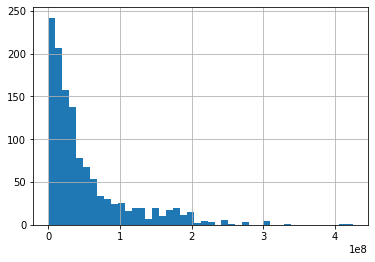

In [37]:
tmdb_with_budgets.production_budget.hist(bins='auto')

<AxesSubplot:xlabel='vote_average', ylabel='income'>

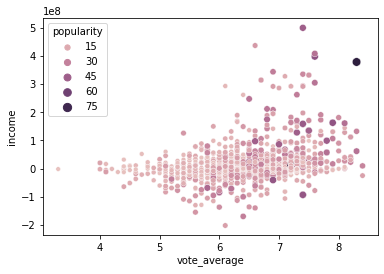

In [38]:
sns.scatterplot(data=tmdb_with_budgets, x='vote_average', y='income', size='popularity', hue='popularity')

In [39]:
# generate box and whisker plots to make case for normalization or remove outliers
tmdb_final.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,5
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,7




# Data Understanding


In [40]:
# generate box and whisker plots to make case for normalization or remove outliers
tmdb_final.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,5
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,7


In [41]:
# get unique set of genres
genres = set(tmdb_final.genre_ids.sum())

# convert genre ids list back to string
tmdb_final.genre_ids = tmdb_final.genre_ids.astype(str)

# check if string contains the genre
for genre in genres:
    tmdb_final[genre] = tmdb_final.genre_ids.str.contains(genre)


In [42]:
# rename columns for genres
genre_mappings = {
    '28': 'Action',
    '12': 'Adventure',
    '16': 'Animation',
    '35': 'Comedy',
    '80': 'Crime',
    '99': 'Documentary',
    '18': 'Drama',
    '10751': 'Family',
    '14': 'Fantasy',
    '36': 'History',
    '27': 'Horror',
    '10402': 'Music',
    '9648': 'Mystery',
    '10749': 'Romance',
    '878': 'Science Fiction',
    '10770': 'TV Movie',
    '53': 'Thriller',
    '10752': 'War',
    '37': 'Western'
}

tmdb_final = tmdb_final.rename(columns=genre_mappings)
tmdb_final.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month,...,Crime,Adventure,History,Mystery,Horror,Romance,Thriller,Action,TV Movie,Science Fiction
0,"['12', '14', '10751']",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11,...,False,True,False,False,False,False,False,False,False,False
1,"['14', '12', '16', '10751']",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3,...,False,True,False,False,False,False,False,False,False,False
2,"['12', '28', '878']",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,5,...,False,True,False,False,False,False,False,True,False,True
3,"['16', '35', '10751']",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11,...,False,False,False,False,False,False,False,False,False,False
4,"['28', '878', '12']",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,7,...,False,True,False,False,False,False,False,True,False,True


In [43]:
tmdb_final.head(20)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month,...,Crime,Adventure,History,Mystery,Horror,Romance,Thriller,Action,TV Movie,Science Fiction
0,"['12', '14', '10751']",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11,...,False,True,False,False,False,False,False,False,False,False
1,"['14', '12', '16', '10751']",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,3,...,False,True,False,False,False,False,False,False,False,False
2,"['12', '28', '878']",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,5,...,False,True,False,False,False,False,False,True,False,True
3,"['16', '35', '10751']",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11,...,False,False,False,False,False,False,False,False,False,False
4,"['28', '878', '12']",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,7,...,False,True,False,False,False,False,False,True,False,True
5,"['12', '14', '10751']",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,2,...,False,True,False,False,False,False,False,False,False,False
6,"['28', '12', '14', '878']",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,12,...,False,True,False,False,False,False,False,True,False,True
7,"['16', '10751', '35']",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,6,...,False,False,False,False,False,False,False,False,False,False
8,"['16', '10751', '35']",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,7,...,False,False,False,False,False,False,False,False,False,False
9,"['16', '28', '35', '10751', '878']",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635,11,...,False,False,False,False,False,False,False,True,False,True


C:\Users\jasbaker\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


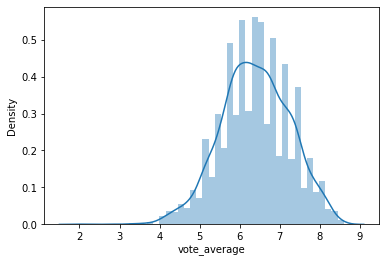

In [44]:
sns.distplot(tmdb_final.vote_average);

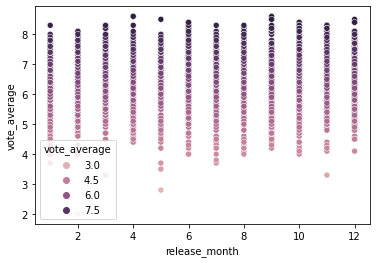

In [45]:
sns.scatterplot(x='release_month', y='vote_average', data=tmdb_final, hue='vote_average');

In [46]:
popularity_by_genre.head()

,id,genre_ids,vote_average,genre
0,12444,12,7.7,Adventure
1,12444,14,7.7,Fantasy
2,12444,10751,7.7,Family
3,10191,14,7.7,Fantasy
4,10191,12,7.7,Adventure


<AxesSubplot:xlabel='id', ylabel='vote_average'>

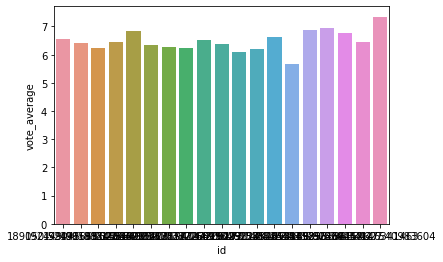

In [47]:
sns.barplot(x='id', y='vote_average', data=popularity_by_genre.groupby(by='genre').mean())

In [48]:
popularity_by_genre.groupby(by='genre').mean()

,id,vote_average
genre,,
Action,199045.883459,6.241855
Adventure,192449.065891,6.414922
Animation,202564.021875,6.827187
Comedy,215017.671577,6.288995
Crime,214549.914226,6.348745
Documentary,274457.475410,7.346721
Drama,229314.524452,6.615683
Family,189050.524927,6.565103
Fantasy,199193.318310,6.446761


In [49]:
tmdb_final.sort_values('vote_average', ascending=False).head(20)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month,...,Crime,Adventure,History,Mystery,Horror,Romance,Thriller,Action,TV Movie,Science Fiction
17389,"['10749', '16', '18']",372058,ja,君の名は。,28.238,2017-04-07,Your Name.,8.6,4161,4,...,False,False,False,False,False,True,False,False,False,False
14711,['99'],359364,fr,Human,5.734,2015-09-11,Human,8.6,155,9,...,False,False,False,False,False,False,False,False,False,False
20632,"['10749', '16', '18']",372058,ja,君の名は。,28.238,2017-04-07,Your Name.,8.6,4161,4,...,False,False,False,False,False,True,False,False,False,False
23861,"['18', '36', '10752']",424,en,Schindler's List,25.334,1993-12-15,Schindler's List,8.5,8065,12,...,False,False,True,False,False,False,False,False,False,False
14173,"['16', '10751', '14']",129,ja,千と千尋の神隠し,32.043,2002-09-20,Spirited Away,8.5,7424,9,...,False,False,False,False,False,False,False,False,False,False
17819,['99'],377462,en,O.J. Made in America,6.939,2016-05-20,O.J. Made in America,8.5,115,5,...,False,False,False,False,False,False,False,False,False,False
20626,"['16', '10751', '14']",129,ja,千と千尋の神隠し,32.043,2002-09-20,Spirited Away,8.5,7424,9,...,False,False,False,False,False,False,False,False,False,False
5201,"['18', '80']",311,en,Once Upon a Time in America,17.717,1984-06-01,Once Upon a Time in America,8.4,2243,6,...,True,False,False,False,False,False,False,False,False,False
23899,['18'],517814,ar,کفرناحوم,20.249,2018-12-14,Capernaum,8.4,329,12,...,False,False,False,False,False,False,False,False,False,False
11031,"['18', '10402']",244786,en,Whiplash,28.784,2014-10-10,Whiplash,8.4,7908,10,...,False,False,False,False,False,False,False,False,False,False


In [50]:
tmdb_with_budgets = pd.merge(tmdb_final, movie_budgets, how='inner', left_on=['title','release_date'], right_on = ['movie', 'release_date'])

In [51]:
tmdb_with_budgets['income'] = tmdb_with_budgets.domestic_gross + tmdb_with_budgets.worldwide_gross - tmdb_with_budgets.production_budget

In [52]:
tmdb_with_budgets.sort_values('income', ascending=False)

,genre_ids,id_x,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month,...,Action,TV Movie,Science Fiction,id_y,movie,production_budget,domestic_gross,worldwide_gross,budget_to_domestic_gross,income
5,"['28', '12', '14', '878']",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676,12,...,True,False,True,1,Avatar,425000000.0,760507625.0,2.776345e+09,1.789430,3.111853e+09
1135,"['12', '28', '14']",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948,4,...,True,False,False,7,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.262718,2.426950e+09
661,"['28', '12', '878', '53']",135397,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056,6,...,True,False,True,34,Jurassic World,215000000.0,652270625.0,1.648855e+09,3.033817,2.086125e+09
257,"['878', '28', '12']",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673,5,...,True,False,True,27,The Avengers,225000000.0,623279547.0,1.517936e+09,2.770131,1.916215e+09
1138,"['28', '12', '14', '878']",284054,en,Black Panther,44.140,2018-02-16,Black Panther,7.4,12365,2,...,True,False,True,42,Black Panther,200000000.0,700059566.0,1.348258e+09,3.500298,1.848318e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,"['80', '53', '28']",201088,en,Blackhat,16.824,2015-01-16,Blackhat,5.3,1165,1,...,True,False,False,47,Blackhat,70000000.0,8005980.0,1.966500e+07,0.114371,-4.232902e+07
743,"['35', '37']",347969,en,The Ridiculous 6,10.187,2015-12-11,The Ridiculous 6,5.0,676,12,...,False,False,False,52,The Ridiculous 6,60000000.0,0.0,0.000000e+00,0.000000,-6.000000e+07
935,"['36', '10749', '18']",354859,en,The Promise,10.158,2017-04-21,The Promise,7.1,195,4,...,False,False,False,78,The Promise,90000000.0,8224288.0,1.055142e+07,0.091381,-7.122430e+07
934,"['36', '10749', '18']",354859,en,The Promise,10.158,2017-04-21,The Promise,7.1,195,4,...,False,False,False,78,The Promise,90000000.0,8224288.0,1.055142e+07,0.091381,-7.122430e+07


# Conducting Z-tests on top performing genres

State the Hypothesis

Taking 6 different samples of 50 movies from the top genres Adventure, Animation, Fantasy, Family, Science Fiction, and Action to compare the movie sample income to the general population movie income.

Alternative Hypothesis: The sample genre mean income is significantly bigger than the population mean.

Null Hypothesis: There is no significant difference between the sample genre mean income and population mean income. 

In this case income = (domestic gross + world wide gross) - production budget

In [53]:
adventure = tmdb_with_budgets[tmdb_with_budgets['Adventure']==True]
animation = tmdb_with_budgets[tmdb_with_budgets['Animation']==True]
fantasy = tmdb_with_budgets[tmdb_with_budgets['Fantasy']==True]
family = tmdb_with_budgets[tmdb_with_budgets['Family']==True]
scifi = tmdb_with_budgets[tmdb_with_budgets['Science Fiction']==True]
action = tmdb_with_budgets[tmdb_with_budgets['Action']==True]

Adventure movies

In [54]:
# take a random sample of the adventure movies income to compare to population income
sample = adventure['income'].sample(n=50)
# find the genre population mean 
mu = tmdb_with_budgets['income'].mean()
mu
# find the sample popularity mean
x_bar = sample.mean()
# sample std (sigma)
sigma = np.std(sample)
# sample size 
n = len(sample)
# calculate the z
z = (x_bar - mu)/(sigma/sqrt(n))
z

3.4741176945528855

In [55]:
# Print the findings
print(f"""
The sample contains {n} observations, having a mean of {x_bar}
billion dollars and a standard deviation (sigma) of {round(sigma,3)} billion dollars.
""")




The sample contains 50 observations, having a mean of 437708241.76
billion dollars and a standard deviation (sigma) of 519246877.671 billion dollars.



In [56]:
# calculate the p-value
stats.norm.cdf(z)

0.9997437319171932

In [57]:
# Interpret p-value
pval = 1 - stats.norm.cdf(z)
pval 

0.0002562680828067654

Our p-value (0.000256) is smaller than the alpha of 0.05. There is enough evidence to reject the null hypothesis given this sample with an alpha of 0.05. Given this evidence, there is a significant difference between the adventure income mean and the population income mean. The results show a significant increase in income as the result of the genre. 

Animation

In [58]:
# take a random sample of the animation movies income to compare to population income
sample = animation['income'].sample(n=50)
# find the genre population mean 
mu = tmdb_with_budgets['income'].mean()
mu
# find the sample popularity mean
x_bar = sample.mean()
# sample std (sigma)
sigma = np.std(sample)
# sample size 
n = len(sample)
# calculate the z
z = (x_bar - mu)/(sigma/sqrt(n))
z

4.483238634291383

In [59]:
# Print the findings
print(f"""
The sample contains {n} observations, having a mean of {x_bar}
billion dollars and a standard deviation (sigma) of {round(sigma,3)} billion dollars.
""")


The sample contains 50 observations, having a mean of 409582575.14
billion dollars and a standard deviation (sigma) of 358010447.483 billion dollars.



In [60]:
# calculate the p-value
stats.norm.cdf(z)

0.999996324068246

In [61]:
# Interpret p-value
pval = 1 - stats.norm.cdf(z)
pval 

3.67593175398806e-06

Our p-value (3.675e-6) is smaller than the alpha of 0.05. There is enough evidence to reject the null hypothesis given this sample with an alpha of 0.05. Given this evidence, there is a significant difference between the animation income mean and the population income mean. The results show a significant increase in income as the result of the genre.

Fantasy

In [62]:
# take a random sample of the fantasy movies income to compare to population income
sample = fantasy['income'].sample(n=50)
# find the genre population mean 
mu = tmdb_with_budgets['income'].mean()
mu
# find the sample popularity mean
x_bar = sample.mean()
# sample std (sigma)
sigma = np.std(sample)
# sample size 
n = len(sample)
# calculate the z
z = (x_bar - mu)/(sigma/sqrt(n))
z

4.808468846003551

In [63]:
# Print the findings
print(f"""
The sample contains {n} observations, having a mean of {x_bar}
billion dollars and a standard deviation (sigma) of {round(sigma,3)} billion dollars.
""")


The sample contains 50 observations, having a mean of 438938496.48
billion dollars and a standard deviation (sigma) of 376964900.504 billion dollars.



In [64]:
# calculate the p-value
stats.norm.cdf(z)

0.9999992395463739

In [102]:
# Interpret p-value
pval = 1 - stats.norm.cdf(z)
pval 

0.01891844248718144

Our p-value (0.0189) is smaller than the alpha of 0.05. There is enough evidence to reject the null hypothesis given this sample with an alpha of 0.05. Given this evidence, there is a significant difference between the fantasy income mean and the population income mean. The results show a significant increase in income as the result of the genre.

Family

In [73]:
# take a random sample of the family movies income to compare to population income
sample = family['income'].sample(n=50)
# find the genre population mean 
mu = tmdb_with_budgets['income'].mean()
mu
# find the sample popularity mean
x_bar = sample.mean()
# sample std (sigma)
sigma = np.std(sample)
# sample size 
n = len(sample)
# calculate the z
z = (x_bar - mu)/(sigma/sqrt(n))
z

3.612708841407762

In [74]:
# Print the findings
print(f"""
The sample contains {n} observations, having a mean of {x_bar}
billion dollars and a standard deviation (sigma) of {round(sigma,3)} billion dollars.
""")


The sample contains 50 observations, having a mean of 357975695.74
billion dollars and a standard deviation (sigma) of 343268882.237 billion dollars.



In [75]:
# calculate the p-value
stats.norm.cdf(z)

0.9998484925583958

In [76]:
# Interpret p-value
pval = 1 - stats.norm.cdf(z)
pval 

0.00015150744160419283

Our p-value (0.0001515) is smaller than the alpha of 0.05. There is enough evidence to reject the null hypothesis given this sample with an alpha of 0.05. Given this evidence, there is a significant difference between the family income mean and the population income mean. The results show a significant increase in income as the result of the genre.

Science Fiction

In [97]:
# take a random sample of the Science Fiction movies income to compare to population income
sample = scifi['income'].sample(n=50)
# find the genre population mean 
mu = tmdb_with_budgets['income'].mean()
mu
# find the sample popularity mean
x_bar = sample.mean()
# sample std (sigma)
sigma = np.std(sample)
# sample size 
n = len(sample)
# calculate the z
z = (x_bar - mu)/(sigma/sqrt(n))
z

2.520326258669023

In [98]:
# Print the findings
print(f"""
The sample contains {n} observations, having a mean of {x_bar}
billion dollars and a standard deviation (sigma) of {round(sigma,3)} billion dollars.
""")


The sample contains 50 observations, having a mean of 396922777.38
billion dollars and a standard deviation (sigma) of 601322140.726 billion dollars.



In [99]:
# calculate the p-value
stats.norm.cdf(z)

0.9941376948142956

In [100]:
# Interpret p-value
pval = 1 - stats.norm.cdf(z)
pval 

0.005862305185704408

Our p-value (0.00586) is smaller than the alpha of 0.05. There is enough evidence to reject the null hypothesis given this sample with an alpha of 0.05. Given this evidence, there is a significant difference between the science fiction income mean and the population income mean. The results show a significant increase in income as the result of the genre.

Action

In [89]:
# take a random sample of the Science Fiction movies income to compare to population income
sample = action['income'].sample(n=50)
# find the genre population mean 
mu = tmdb_with_budgets['income'].mean()
mu
# find the sample popularity mean
x_bar = sample.mean()
# sample std (sigma)
sigma = np.std(sample)
# sample size 
n = len(sample)
# calculate the z
z = (x_bar - mu)/(sigma/sqrt(n))
z

2.876908501348902

In [90]:
# Print the findings
print(f"""
The sample contains {n} observations, having a mean of {x_bar}
billion dollars and a standard deviation (sigma) of {round(sigma,3)} billion dollars.
""")


The sample contains 50 observations, having a mean of 419153516.26
billion dollars and a standard deviation (sigma) of 581430741.553 billion dollars.



In [91]:
# calculate the p-value
stats.norm.cdf(z)

0.9979920398850719

In [92]:
# Interpret p-value
pval = 1 - stats.norm.cdf(z)
pval 

0.002007960114928098

Our p-value (0.00200) is smaller than the alpha of 0.05. There is enough evidence to reject the null hypothesis given this sample with an alpha of 0.05. Given this evidence, there is a significant difference between the action income mean and the population income mean. The results show a significant increase in income as the result of the genre.

# T-test

Performed the t-test on previous data set no longer in use. 

In [37]:
# take a random sample from the popularity by genre
sample2 = newtmdbDF['popularity'].sample(n=100, random_state=1)
# find the popularity population mean (mean of the original df)
mu2 = newtmdbDF['popularity'].mean()
mu2
# find the sample popularity mean
x_bar2 = sample2.mean()
# sample std (sigma)
sigma2 = np.std(sample2, ddof=1)
# sample size 
n = len(sample)
# degrees of freedom
df2 = n-1
# difference between sample mean and population mean
diff2 = x_bar2 - mu2

In [38]:
# Print the findings
print(f"""
The sample contains {n} observations, having a popularity mean of {x_bar2}
and a standard deviation (sigma) of {round(sigma2,3)}, with {df2} degrees of freedom.

The difference between sample and population means is {round(diff2, 2)}.
""")



The sample contains 100 observations, having a popularity mean of 8.16047
and a standard deviation (sigma) of 5.013, with 99 degrees of freedom.

The difference between sample and population means is -0.33.



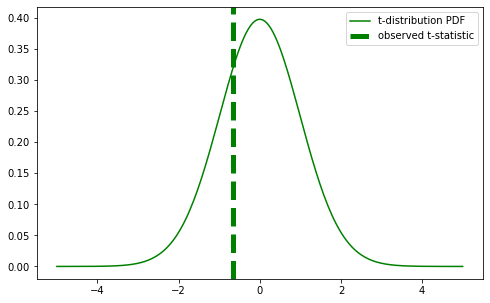

In [39]:
# graph the popularity distribution
# choose a significance level alpha
a = 0.05
# calculate the t-statistic
t = (x_bar2 - mu2)/(sigma2/np.sqrt(n))
# setting up figures and axes
fig, ax = plt.subplots(figsize=(8,5))
# generate data for plotting the pdf
x = np.linspace(-5, 5, 200)
# use stats.t.pdf to get values on the probability
# density function for the t-distribution
y = stats.t.pdf(x, df, 0, 1)
# plot the pdf as a line graph
ax.plot(x, y, color='green', label='t-distribution PDF')
#plot a vertical line for our measure difference in sales t-statistic
ax.axvline(t, color='green', linestyle='--', lw=5, label='observed t-statistic')
ax.legend();
# Leptokurti curve showing Kurtosis in this distribution
# This is the probability density function for the
# t-distribution, not the popularity distribution

In [40]:
stats.t.cdf(1.660, df=99)

0.9499605662039354

In [41]:
t_crit = stats.t.ppf(1 - 0.05, df=99)
t_crit

1.6603911559963895

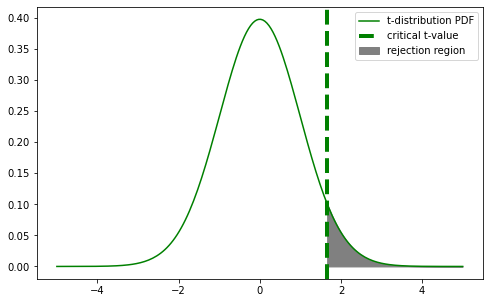

In [42]:
# The t-critical value marks the boundary of the
# rejection region, this is a one tail t-test, we 
# can say that the rejection region is anything greater
# than the critical t-statistic. If the sample t-statistic
# falls into the rejection region then we can reject
# the null hypothesis.

# Set up figure and axes
fig, ax = plt.subplots(figsize=(8,5))

# Plot the PDF as a line graph
# (x and y were created in previous plotting code)
ax.plot(x, y, color='green', label="t-distribution PDF")

# Plot a vertical line for our critical t-value
ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')

# Fill area under line graph where x value is creater than critical t
ax.fill_betweenx(y,x,t_crit,where=x > t_crit,color="gray",label="rejection region")

ax.legend();


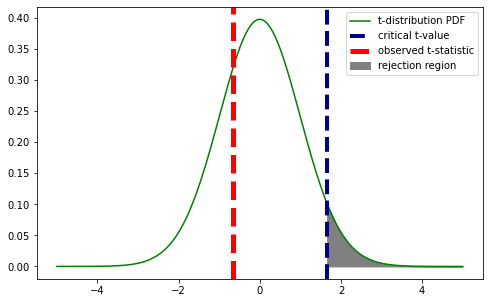

In [43]:
# Combined graphs to show our observed t-value along
# with the critical t-value and rejection region
# Set up figure and axes
fig, ax = plt.subplots(figsize=(8,5))

# Plot the PDF as a line graph
# (x and y were created in previous plotting code)
ax.plot(x, y, color='green', label="t-distribution PDF")

# Plot a vertical line for our critical t-value
ax.axvline(t_crit,color='darkblue',linestyle='--',lw=4,label='critical t-value')

# Fill area under line graph where x value is creater than critical t
ax.fill_betweenx(y,x,t_crit,where=x > t_crit,color="gray",label="rejection region")

# Plot a vertical line for our measured difference in sales t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='observed t-statistic')

ax.legend();


In [44]:
# The observed t-statistic is not in the rejection
# region which means that there is not a statistically
# significant relationship between popularity 
# and Genre IDs.
p_value = stats.t.sf(t, df=99)
p_value
# Our p-value is 0.7463347 meaning that we fail to
# reject the null hypothesis. Given our alpha of 0.05
# we can fail to reject the null hypothesis at a significance
# level of 0.05.


0.7463347939819744